# Code for grid

In [21]:
import netCDF4
import numpy

from shapely.geometry import shape, Polygon

In [ ]:
from geophys_utils._polygon_utils import get_grid_edge_points
from geophys_utils._netcdf_grid_utils import NetCDFGridUtils
from geophys_utils._netcdf_point_utils import NetCDFPointUtils
from geophys_utils._netcdf_line_utils import NetCDFLineUtils, 

In [3]:
local_file = 'mNSW1027.nc'



ds = netCDF4.Dataset(local_file)
ngu = NetCDFGridUtils(ds)

list(ds.variables)

['crs', 'lat', 'lon', 'mag_tmi_anomaly']

In [4]:
values = ds['mag_tmi_anomaly']
lon = ds['lon']
lat = ds['lat']

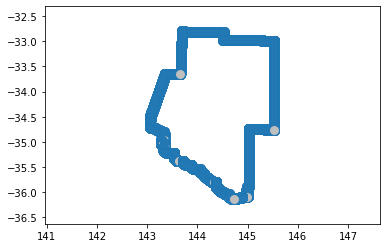

In [9]:
#points = numpy.array(get_grid_edge_points(values, (lat, lon), values._FillValue))

#plotPoints(points)

In [ ]:
shapely_shape = ngu.get_concave_hull()

In [ ]:
shapely_shape

# Code for lines

In [14]:
def segment(s):
    return ((s[0, 0], s[0, 1]), (s[1, 0], s[1, 1]))

def get_points(ds, down_sample=None):
    latitude_first = ds.variables['latitude_first'][:]
    longitude_first = ds.variables['longitude_first'][:]
    latitude_last = ds.variables['latitude_last'][:]
    longitude_last = ds.variables['longitude_last'][:]
    
    if down_sample is not None:
        latitudes = np.concatenate((latitude_first, ds['latitude'][::down_sample], latitude_last), axis=0)
        longitudes = np.concatenate((longitude_first, ds['longitude'][::down_sample], longitude_last), axis=0)
    else:
        latitudes = np.concatenate((latitude_first, latitude_last), axis=0)
        longitudes = np.concatenate((longitude_first, longitude_last), axis=0)
        
    points = np.transpose(np.array([latitudes, longitudes]))
    return points

In [11]:
local_file = 'GSNSW_P1028MAG.nc'

ds = netCDF4.Dataset(local_file)

list(ds.variables)

['line',
 'line_index',
 'flag_levelling',
 'flag_linetype',
 'fiducial',
 'height',
 'flight',
 'altitude_gps',
 'latitude',
 'longitude',
 'mag_awags',
 'mag_lev',
 'crs',
 'longitude_first',
 'longitude_last',
 'latitude_first',
 'latitude_last',
 'bounding_polygon',
 'survey']

In [16]:
import numpy as np
points = get_points(ds)

In [17]:
points.shape

(1126, 2)

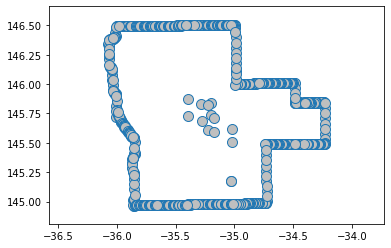

In [18]:
#plotPoints(points)


In [12]:
netcdf_line_utils = NetCDFLineUtils(ds)

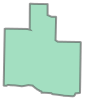

In [13]:
netcdf_line_utils.get_concave_hull()
# choose your own smoothness
# this shape is up-side down but correct

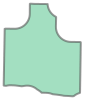

In [24]:
netcdf_line_utils.get_concave_hull(smoothness=0.3)

# Code for point dataset

In [25]:
netcdf_path = 'http://dapds00.nci.org.au/thredds/dodsC/rr2/ground_gravity/NT/P201780/points/P201780_GNDGRAV/P201780_GNDGRAV.nc'
netcdf_dataset = netCDF4.Dataset(netcdf_path + '#fillmismatch')

In [26]:
point = NetCDFPointUtils(netcdf_dataset)

p = point.get_xy_coord_values()

In [29]:
hull = concaveHull(p, k=3)

k 3


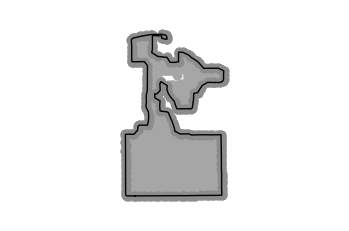

In [30]:
#plotPath(p, numpy.array(hull))

In [31]:
hull_geo = point.get_concave_hull()

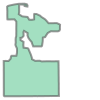

In [32]:
hull_geo